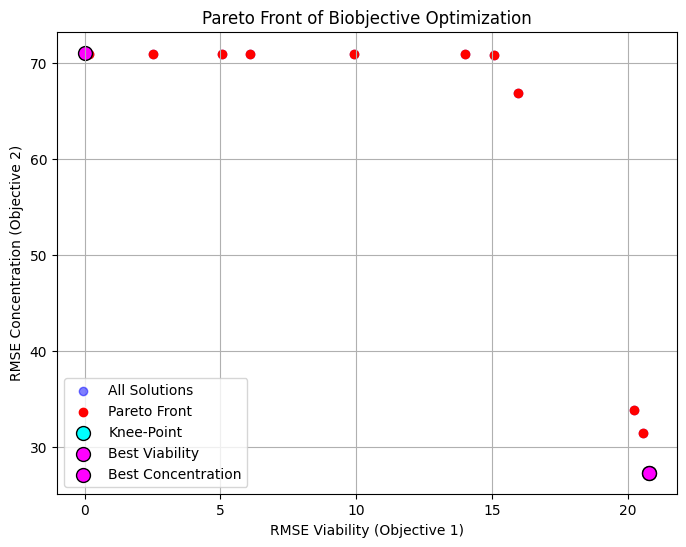

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

# Load the objective values
objective_values = np.loadtxt('../../data_output/Calibration/Objective_values.csv', delimiter=",")

# Extract objectives
obj1 = objective_values[:, 0]  # RMSE Viability
obj2 = objective_values[:, 1]  # RMSE Concentration

# Identify Pareto front
nds = NonDominatedSorting().do(objective_values, only_non_dominated_front=True)

pareto_obj1 = obj1[nds]
pareto_obj2 = obj2[nds]

# Find knee-point (heuristic: solution closest to (0,0))
distances = np.sqrt(pareto_obj1**2 + pareto_obj2**2)
knee_idx = np.argmin(distances)
knee_obj1, knee_obj2 = pareto_obj1[knee_idx], pareto_obj2[knee_idx]

# Find best viability and concentration points
best_viability_idx = np.argmin(pareto_obj1)
best_concentration_idx = np.argmin(pareto_obj2)

# Plot all solutions
plt.figure(figsize=(8, 6))
plt.scatter(obj1, obj2, color='blue', alpha=0.5, label="All Solutions")
plt.scatter(pareto_obj1, pareto_obj2, color='red', label="Pareto Front")

# Highlight knee-point and extreme points
plt.scatter(knee_obj1, knee_obj2, color='cyan', edgecolors='black', s=100, label="Knee-Point")
plt.scatter(pareto_obj1[best_viability_idx], pareto_obj2[best_viability_idx], color='magenta', edgecolors='black', s=100, label="Best Viability")
plt.scatter(pareto_obj1[best_concentration_idx], pareto_obj2[best_concentration_idx], color='magenta', edgecolors='black', s=100, label="Best Concentration")

plt.xlabel("RMSE Viability (Objective 1)")
plt.ylabel("RMSE Concentration (Objective 2)")
plt.title("Pareto Front of Biobjective Optimization")
plt.legend()
plt.grid()
plt.show()



### Parameter values

In [4]:
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

# Load results
parameter_values = np.loadtxt('../../data_output/Calibration/Space_values.csv', delimiter=",")

# Get the corresponding parameter sets
pareto_params_viability = parameter_values[best_viability_idx]
pareto_params_concentration = parameter_values[best_concentration_idx]

# Print and save results
print("Non-Dominated Parameter Sets:")
print("Viability:")
print(pareto_params_viability)
print("Concentration:")
print(pareto_params_concentration)

#np.savetxt("data_output/Pareto_Parameter_Values.csv", pareto_params, delimiter=",")


Non-Dominated Parameter Sets:
Viability:
[1.23277921e+01 1.37589719e+00 5.91406744e-02 1.58052974e-01
 4.05692924e-02 1.10798939e+00 4.62504937e-03 1.91817319e+00
 9.35378212e-05]
Concentration:
[5.89973703e+01 1.01486748e+00 2.49277327e-01 6.25780376e-01
 3.15431964e-02 1.16142542e+00 1.81703141e-03 2.05814634e+00
 8.58206733e-05]


#### Retrieve calibrated viability and concentration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

viability = pd.read_csv('../data_output/Calibration/viability_calibrated.csv', delimiter=",")
concentration = pd.read_csv('../data_output/Calibration/concentration_calibrated.csv', delimiter=",")

experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
viability_exp = experimental[:,1]
concentration_exp = experimental[:,2]
time_points = experimental[:,0]

### Plot curves

#### Viability

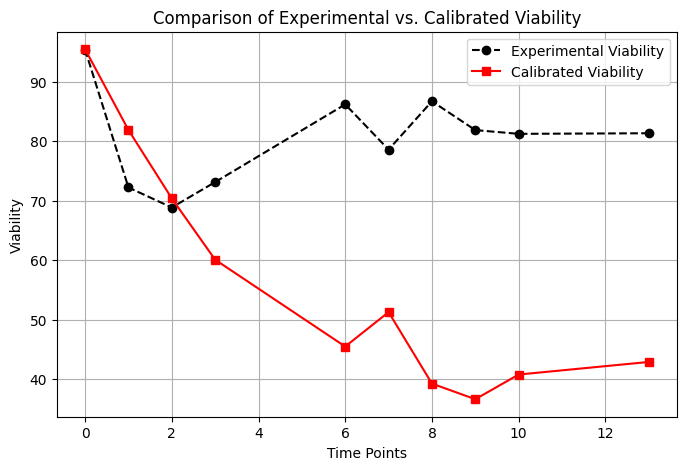

In [ ]:
# Convert viability dataframe to numpy (assuming it's in a single column)
viability_calibrated = viability.to_numpy().flatten()

# Plot the curves
plt.figure(figsize=(8, 5))
plt.plot(time_points, viability_exp, label="Experimental viability", color="black", linestyle="--", marker="o")
plt.plot(time_points, viability_calibrated, label="Calibrated viability", color="red", linestyle="-", marker="s")

# Labels and title
plt.xlabel("Time points")
plt.ylabel("Viability")
plt.title("Comparison of experimental vs. calibrated viability")
plt.legend()
plt.grid()

# Show plot
plt.show()

#### Concentration

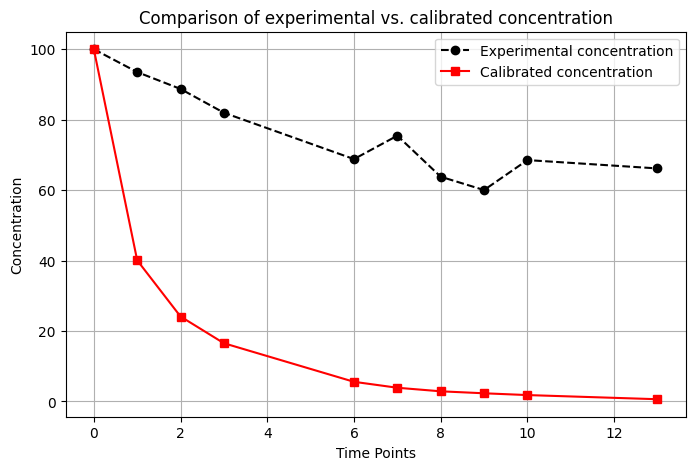

In [4]:
# Convert viability dataframe to numpy (assuming it's in a single column)
concentration_calibrated = concentration.to_numpy().flatten()

# Plot the curves
plt.figure(figsize=(8, 5))
plt.plot(time_points, concentration_exp, label="Experimental concentration", color="black", linestyle="--", marker="o")
plt.plot(time_points, concentration_calibrated, label="Calibrated concentration", color="red", linestyle="-", marker="s")

# Labels and title
plt.xlabel("Time Points")
plt.ylabel("Concentration")
plt.title("Comparison of experimental vs. calibrated concentration")
plt.legend()
plt.grid()

# Show plot
plt.show()